Further exploring Instacart dataset 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [3]:
order_products_train_df = pd.read_csv("../input/order_products__train.csv")
order_products_prior_df = pd.read_csv("../input/order_products__prior.csv")
orders_df = pd.read_csv("../input/orders.csv")
products_df = pd.read_csv("../input/products.csv")
aisles_df = pd.read_csv("../input/aisles.csv")
departments_df = pd.read_csv("../input/departments.csv")


In [4]:
orders_df_2 = orders_df[orders_df['eval_set'] == 'prior']
orders_df_2 = orders_df_2[orders_df_2['days_since_prior_order'] == 2]
orders_df_3 = pd.merge(left=orders_df_2, right=order_products_prior_df, how='inner', on=['order_id'])
orders_df_3 = orders_df_3[orders_df_3['reordered'] == 1]
orders_df_3= pd.merge(left=orders_df_3, right=products_df, how='inner', on=['product_id'])
orders_df_3.head()
orders_df_3.to_csv('prior_orders_with_all_information.csv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


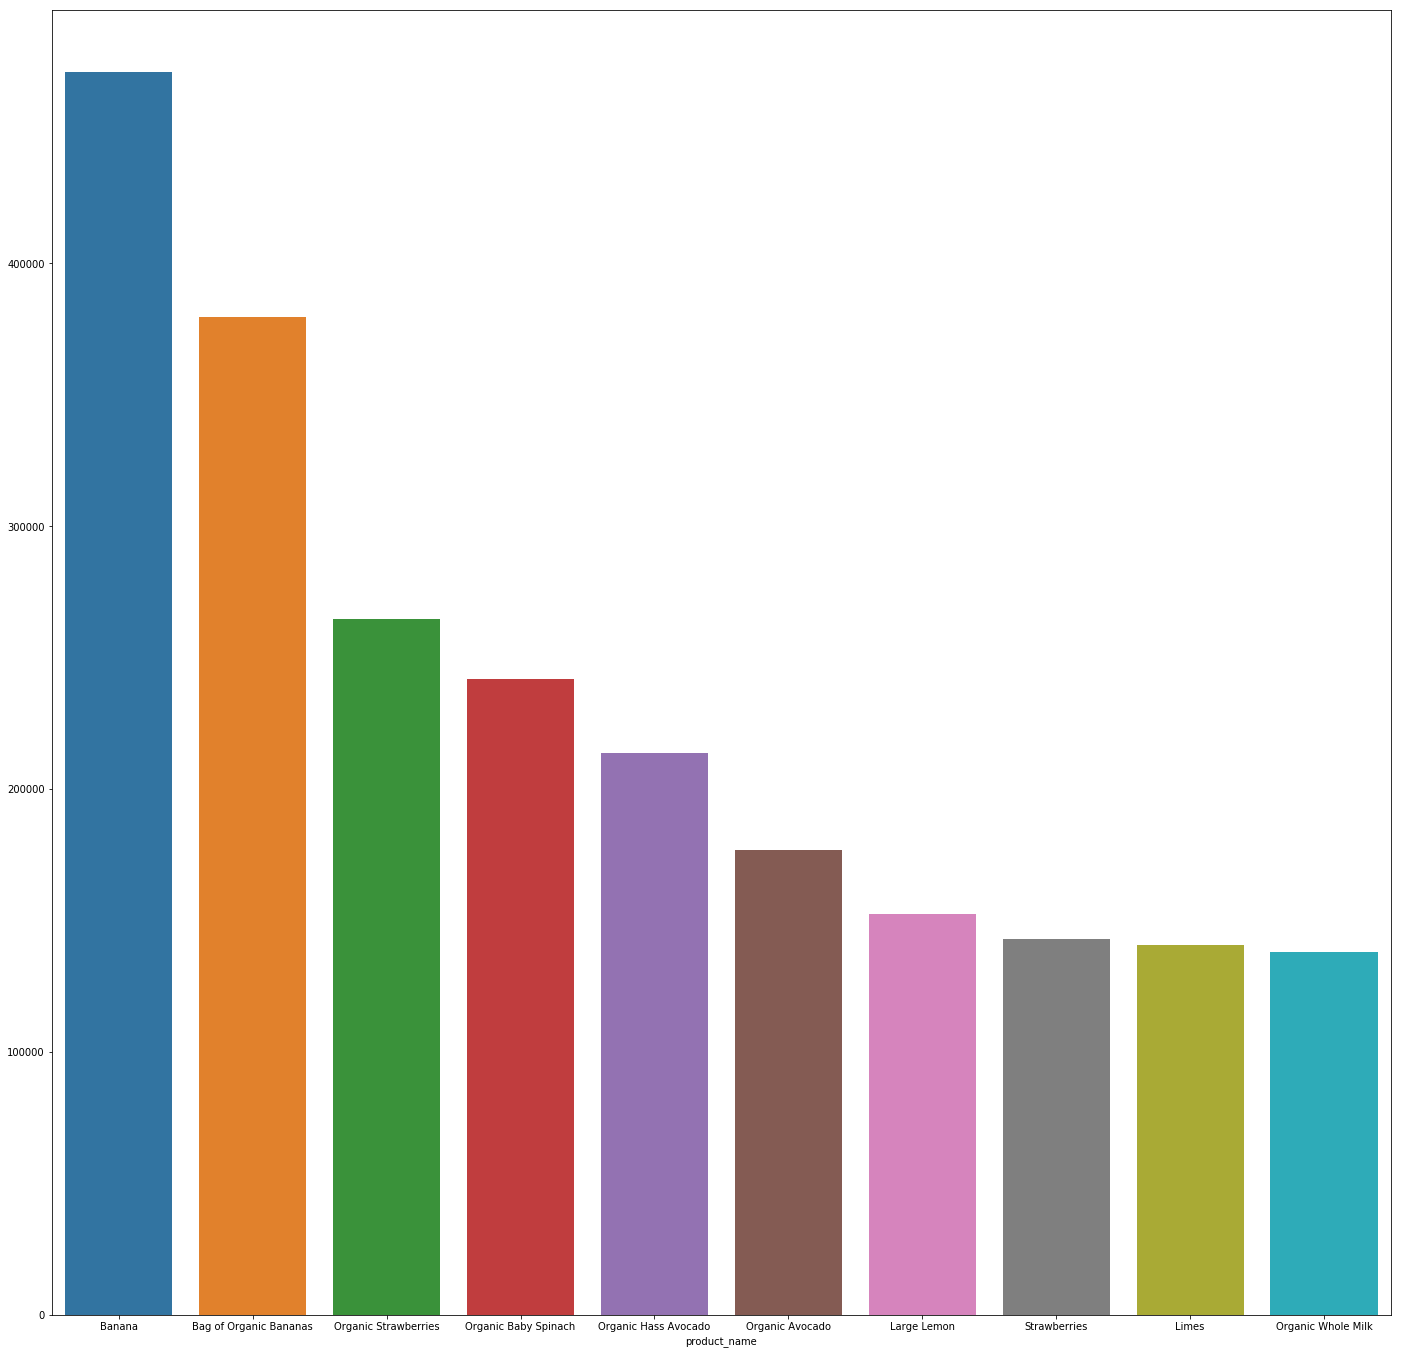

In [5]:
grouped =order_products_prior_df.groupby("product_id")["reordered"].aggregate({'Tot_reorders': 'count'}).reset_index()
grouped = pd.merge(grouped, products_df[['product_id', 'product_name']], how='inner', on=['product_id'])
grouped = grouped.sort_values(by='Tot_reorders', ascending=False).head(10)
grouped  = grouped.groupby(['product_name']).sum()['Tot_reorders'].sort_values(ascending=False)
fig, axes = plt.subplots(figsize=(24, 24))
sns.barplot(grouped.index, grouped.values)


In [6]:
order_products_prior_df_2 = order_products_prior_df[order_products_prior_df['reordered'] == 0]
order_products_prior_df_2 = order_products_prior_df_2.groupby(["reordered","product_id"])["order_id"].aggregate({'Least reordered products': 'count'}).reset_index()
order_products_prior_df_2 = order_products_prior_df_2.sort_values(by='Least reordered products', ascending=True).head(15)
order_products_prior_df_2 = pd.merge(left=products_df, right=order_products_prior_df_2, how='inner', on=['product_id'])
order_products_prior_df_2.sort_values(by='Least reordered products', ascending=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,product_id,product_name,aisle_id,department_id,reordered,Least reordered products
0,3426,Organic Better Rest Tea Blend,94,7,0,1
1,5255,Chardonnay Carneros,62,5,0,1
2,8435,Vitamin D Gummies,47,11,0,1
3,9342,Cinnamon Rice Pudding Snacks,71,16,0,1
4,12718,Kb Clb Stick Organic Fmly,100,21,0,1
5,14020,Cabernet Sauvignon 2015,28,5,0,1
6,15388,Orange Flavored Ice Cubes,37,1,0,1
7,21428,Original Lager,27,5,0,1
8,22229,The Purple Edition Sugarfree Acai Berry Energy...,100,21,0,1
9,25482,Blueberry Blast Fruit and Chia Seed Bar,3,19,0,1


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


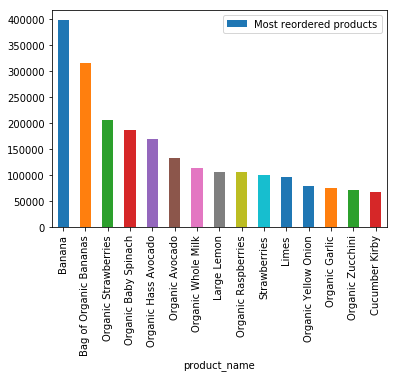

In [7]:
order_products_prior_df_3 = order_products_prior_df[order_products_prior_df['reordered'] == 1]
order_products_prior_df_3 = order_products_prior_df_3.groupby(["reordered","product_id"])["order_id"].aggregate({'Most reordered products': 'count'}).reset_index()
order_products_prior_df_3 = order_products_prior_df_3.sort_values(by='Most reordered products', ascending=False).head(15)
order_products_prior_df_3 = pd.merge(left=products_df, right=order_products_prior_df_3, how='inner', on=['product_id'])
order_products_prior_df_3 = order_products_prior_df_3.sort_values(by='Most reordered products', ascending=False)
order_products_prior_df_3.plot(kind='bar', y='Most reordered products', x='product_name');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


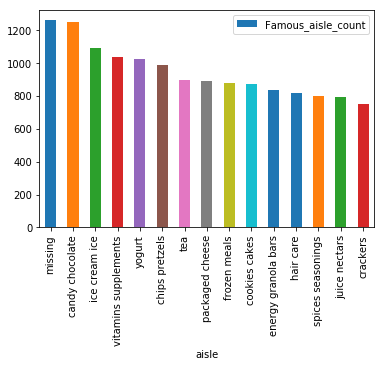

In [8]:
items  = pd.merge(left =pd.merge(left=products_df, right=departments_df, how='inner'), right=aisles_df, how='inner')
items = items.groupby("aisle")["product_name"].aggregate({'Famous_aisle_count': 'count'}).reset_index()
items = items.sort_values(by='Famous_aisle_count', ascending=False).head(15)
items.plot(kind='bar',x='aisle', y='Famous_aisle_count')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


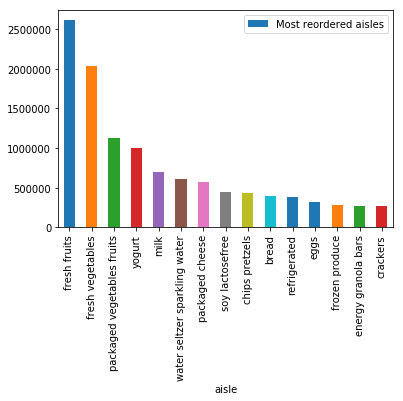

In [9]:
order_products_prior_df_3 = order_products_prior_df[order_products_prior_df['reordered'] == 1]
order_products_prior_df_3 = order_products_prior_df_3.groupby(["reordered","product_id"])["order_id"].aggregate({'Most reordered aisles': 'count'}).reset_index()
order_products_prior_df_3 = order_products_prior_df_3.sort_values(by='Most reordered aisles', ascending=False)
order_products_prior_df_3 = pd.merge(left=products_df, right=order_products_prior_df_3, how='inner', on=['product_id'])
order_products_prior_df_3 = pd.merge(left=aisles_df, right=order_products_prior_df_3, how='inner', on=['aisle_id'])
order_products_prior_df_3 = order_products_prior_df_3.groupby(["reordered","aisle"])["Most reordered aisles"].aggregate({'Most reordered aisles': 'sum'}).reset_index()
order_products_prior_df_3 = order_products_prior_df_3.sort_values(by='Most reordered aisles', ascending=False).head(15)
order_products_prior_df_3.plot(kind='bar', y='Most reordered aisles', x='aisle');


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


Text(0.5,0,'Department Name')

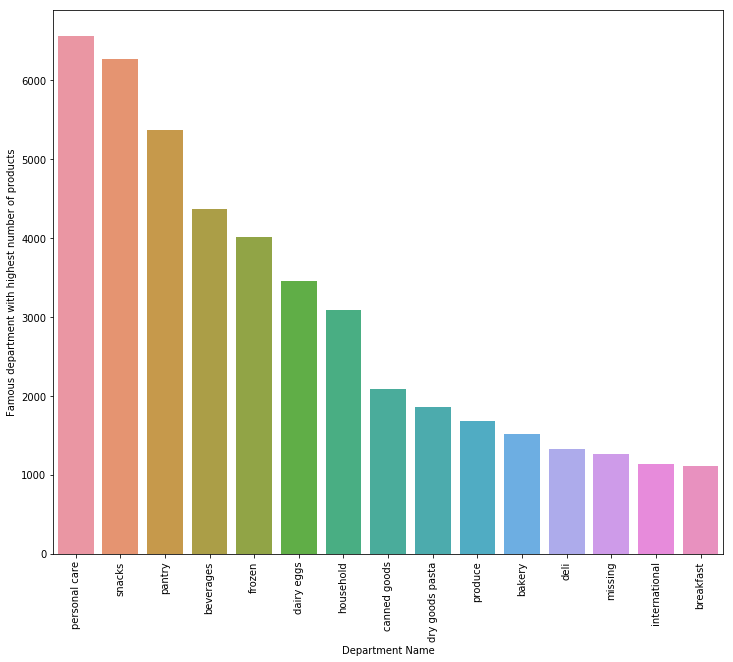

In [10]:
items  = pd.merge(left =pd.merge(left=products_df, right=departments_df, how='inner'), right=aisles_df, how='inner')
items = items.groupby("department")["product_name"].aggregate({'Famous_department_count': 'count'}).reset_index()
items = items.sort_values(by='Famous_department_count', ascending=False).head(15)
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(items.department, items.Famous_department_count)
plt.ylabel('Famous department with highest number of products')
plt.xlabel('Department Name')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


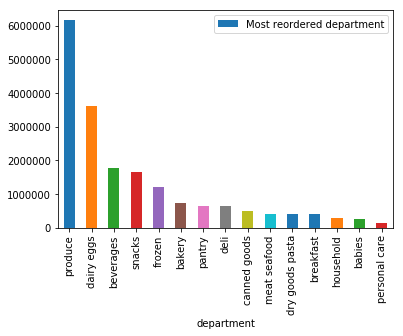

In [11]:
order_products_prior_df_3 = order_products_prior_df[order_products_prior_df['reordered'] == 1]
order_products_prior_df_3 = order_products_prior_df_3.groupby(["reordered","product_id"])["order_id"].aggregate({'Most reordered department': 'count'}).reset_index()
order_products_prior_df_3 = order_products_prior_df_3.sort_values(by='Most reordered department', ascending=False)
order_products_prior_df_3= pd.merge(left=products_df, right=order_products_prior_df_3, how='inner', on=['product_id'])
order_products_prior_df_3 = pd.merge(left=departments_df, right=order_products_prior_df_3, how='inner', on=['department_id'])
order_products_prior_df_3 = order_products_prior_df_3.groupby(["reordered","department"])["Most reordered department"].aggregate({'Most reordered department': 'sum'}).reset_index()
order_products_prior_df_3 = order_products_prior_df_3.sort_values(by='Most reordered department', ascending=False).head(15)
order_products_prior_df_3.plot(kind='bar', y='Most reordered department', x='department');

In [12]:
items  = pd.merge(left =pd.merge(left=products_df, right=departments_df, how='inner'), right=aisles_df, how='inner')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,snacks,cookies cakes
2,102,Danish Butter Cookies,61,19,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,snacks,cookies cakes


**Merging Items, departments and products with order train data**

In [13]:

complete_train = pd.merge(left = items, right = order_products_train_df, how = 'inner', on=['product_id'])

In [14]:
complete_train.head()



,product_id,product_name,aisle_id,department_id,department,aisle,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,6695,7,1
1,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,48361,9,0
2,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,63770,4,0
3,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,75339,9,0
4,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,240996,3,1


In [15]:
#orders_df.head()
orders_df_2 = orders_df[orders_df['eval_set'] == 'train']
orders_df_2.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


**Merging "merged train with item/product/department" dataset with that of other features from "orders_df" dataset**

In [16]:
complete_train_2 = pd.merge(left = complete_train, right = orders_df_2, how = 'inner', on=['order_id'])
complete_train_2.head()

,product_id,product_name,aisle_id,department_id,department,aisle,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes,6695,7,1,1540,train,29,1,1,8.0
1,40199,Chocolate Chip Cookies,61,19,snacks,cookies cakes,6695,17,1,1540,train,29,1,1,8.0
2,45051,Pub Mix,107,19,snacks,chips pretzels,6695,6,1,1540,train,29,1,1,8.0
3,10310,Wheat Thins Original,78,19,snacks,crackers,6695,20,1,1540,train,29,1,1,8.0
4,37600,Organic Kettle Corn,23,19,snacks,popcorn jerky,6695,1,1,1540,train,29,1,1,8.0


**Dropping names columns**

In [17]:
complete_train_3 = complete_train_2.drop(['product_name','department','aisle','eval_set'], axis=1)
complete_train_3.head()


,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,61,19,6695,7,1,1540,29,1,1,8.0
1,40199,61,19,6695,17,1,1540,29,1,1,8.0
2,45051,107,19,6695,6,1,1540,29,1,1,8.0
3,10310,78,19,6695,20,1,1540,29,1,1,8.0
4,37600,23,19,6695,1,1,1540,29,1,1,8.0


**Creating x and y from train dataset to train the model ...later to be used for testing test dataset**

In [18]:
X = complete_train_3[['product_id', 'aisle_id', 'department_id', 'order_id', 'order_dow', 'order_hour_of_day','days_since_prior_order']]
y = complete_train_3['reordered']

X.head()

,product_id,aisle_id,department_id,order_id,order_dow,order_hour_of_day,days_since_prior_order
0,1,61,19,6695,1,1,8.0
1,40199,61,19,6695,1,1,8.0
2,45051,107,19,6695,1,1,8.0
3,10310,78,19,6695,1,1,8.0
4,37600,23,19,6695,1,1,8.0


In [19]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: reordered, dtype: int64

LOGISTIC REGRESSION MODEL -1

LOGISTIC REGRESSION MODEL -3

In [20]:
#from sklearn.model_selection import train_test_split

In [21]:
#X_train, X_test, y_train, y_test = train_test_split(
#X, y, test_size=0.3, random_state=101)
#training, validation = train_test_split(complete_train_3, train_size=.60)

**LOGISTIC REGRESSION MODEL ON TRAINING DATASET**

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logModel = LogisticRegression(
    penalty='l2', 
    fit_intercept=True,
    class_weight="balanced"
)

In [24]:
logModel.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [25]:
#Calculate score for the Linear Regression model
#logModel.score(X_train, y_train)

In [26]:
#Predict whether an item is reordered or not on test data set 
predictions = logModel.predict(X)
#print (predictions)
probs = logModel.predict_proba(X) 
print(probs)


[[0.56168894 0.43831106]
 [0.51587339 0.48412661]
 [0.49245157 0.50754843]
 ...
 [0.61956797 0.38043203]
 [0.43237004 0.56762996]
 [0.45742461 0.54257539]]


In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# generate evaluation metrics
print (metrics.accuracy_score(y, predictions)) 
print (metrics.roc_auc_score(y, probs[:, 1]))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.5694881689304696
0.5895090421783266


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, predictions)
confusion_matrix

array([[322933, 232860],
       [363234, 465590]])

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y, predictions))
#print (metrics.confusion_matrix(y_test, predicted)) 
#print( metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.47      0.58      0.52    555793
           1       0.67      0.56      0.61    828824

   micro avg       0.57      0.57      0.57   1384617
   macro avg       0.57      0.57      0.56   1384617
weighted avg       0.59      0.57      0.57   1384617



In [31]:
#MODEL EVALUATION USING CROSS-VALIDATION
#evaluate model using 10-fold cross-validation, to see if the accuracy holds up more rigorously.
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10) 
print (scores) 
print (scores.mean())

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.59859313 0.59859313 0.59859313 0.59859745 0.59859455 0.59859455
 0.59859455 0.59859455 0.59859455 0.59859455]
0.5985944127543461


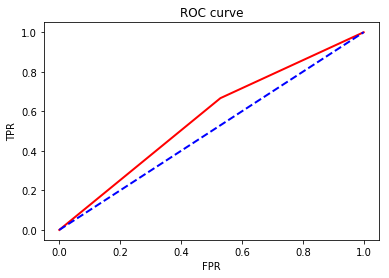

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


##Computing false and true positive rates
fpr, tpr,_=roc_curve(logModel.predict(X),y,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [33]:
roc_auc_score(logModel.predict(X),y)

0.5686189334352646

In [34]:
numeric_cols = complete_train_3.columns[complete_train_3.dtypes != 'object']
numeric_cols

Index(['product_id', 'aisle_id', 'department_id', 'order_id',
       'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [35]:
# Make test set predictions
predictions = logModel.predict(X)
print (predictions)

[0 0 1 ... 0 1 1]


LOGISTIC REGRESSION MODEL - 2

In [ ]:
import statsmodels.api as sm
X = complete_train_3[['product_id', 'aisle_id', 'department_id', 'order_id', 'order_dow', 'order_hour_of_day','days_since_prior_order']]
y = complete_train_3['reordered']

logit = sm.Logit(y, X)

# fit the model
result = logit.fit()
print (result.summary())

In [ ]:
# look at the confidence interval of each coeffecient
print (result.conf_int())

In [ ]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))